In [198]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [199]:
# 01 - Problem (case study): predict the total claim amount = target variable

In [200]:
# 02 - Getting Data

In [201]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [202]:
#03 - Cleaning/Wrangling/EDA
# Change headers names.
# Deal with NaN values.
# Categorical Features.
# Numerical Features.
# Exploration.

In [203]:
# Change headers names.
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(' ', '_'))
data.columns = cols
data.head(100)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,TV87155,Oregon,20946.192510,No,Basic,Bachelor,2/24/11,Employed,F,69738,Suburban,Married,74,2,26,1,2,Personal Auto,Personal L3,Offer1,Branch,492.127532,Four-Door Car,Large
96,KH48895,Arizona,8375.353929,No,Basic,Master,2/15/11,Medical Leave,F,17780,Rural,Married,109,12,18,0,9,Personal Auto,Personal L3,Offer1,Branch,132.588288,SUV,Medsize
97,NZ30757,California,4801.661503,No,Basic,Bachelor,2/16/11,Medical Leave,M,18107,Suburban,Married,62,29,11,0,8,Personal Auto,Personal L2,Offer1,Agent,297.600000,Four-Door Car,Medsize
98,RI22468,Arizona,5745.943340,No,Basic,Bachelor,1/22/11,Employed,F,57740,Urban,Married,74,30,87,3,9,Personal Auto,Personal L1,Offer3,Web,269.905129,Four-Door Car,Medsize


In [204]:
#drop duplicates 
data = data.drop_duplicates()
data.shape

#drop unneccessary columns
data = data.drop(['education'], axis=1)
data.shape


(9134, 23)

In [205]:
#remove zeros in income yes or no?
# how many % of income is zero? 24% - too many to remoive without replacement
data['income'].isna().sum()/len(data['income'])

#data['income'] = data['income'].replace(0,"") - would replace 0 with NaN

#data['income'] = data['income'].apply(pd.to_numeric) - makes income numeric again

# Dont remove 0 in income (should have high correlation with unemployment, check later)


0.0

In [206]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [207]:
# check which values exist in which column
for i in data:
    print(data[i].unique())

['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
[ 2763.519279  6979.535903 12887.43165  ...  8163.890428  7524.442436
  2611.836866]
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
[56274     0 48767 ... 66367 71941 21941]
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Di

In [208]:
# Deal with NaN values. - No NAN Values found
data.isnull().values.any()

False

In [209]:
# Categorical & Numerical Features.
pd.DataFrame(data._get_numeric_data().columns) # numeric columns


,0
0,customer_lifetime_value
1,income
2,monthly_premium_auto
3,months_since_last_claim
4,months_since_policy_inception
5,number_of_open_complaints
6,number_of_policies
7,total_claim_amount


In [210]:
data.select_dtypes('object').columns # categorical columns

Index(['customer', 'state', 'response', 'coverage', 'effective_to_date',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [211]:
#Exploration

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



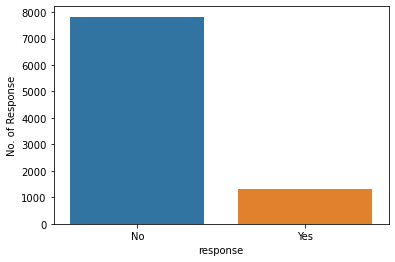

In [212]:
# no of responses

sns.countplot('response', data=data)
plt.ylabel('No. of Response')
plt.show()

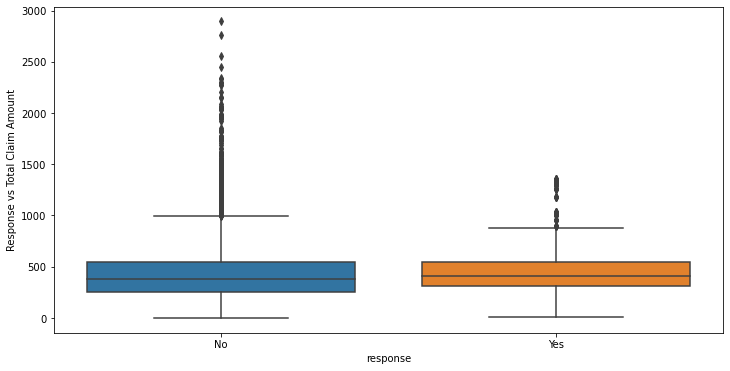

In [213]:
# response rate per total claim amount 

plt.figure(figsize=(12,6))
sns.boxplot(y='total_claim_amount' , x='response', data=data)
plt.ylabel('Response vs Total Claim Amount')
plt.show()

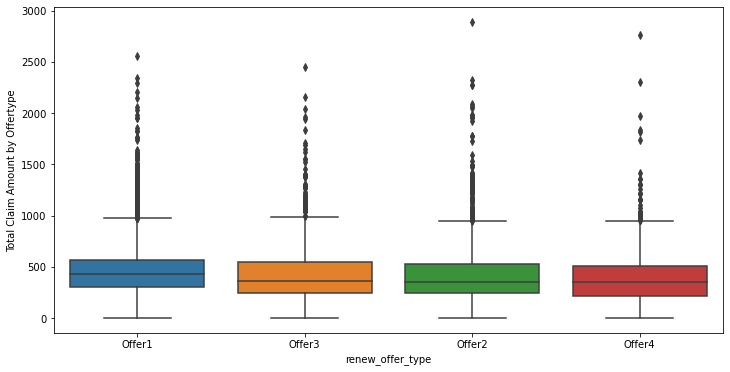

In [214]:
# total claim amount by month since last claim

plt.figure(figsize=(12,6))
sns.boxplot(y='total_claim_amount' , x='renew_offer_type', data = data)
plt.ylabel('Total Claim Amount by Offertype')
plt.show()

In [215]:
X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = np.object)


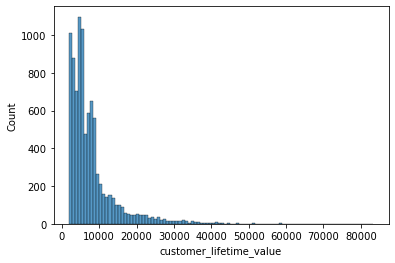

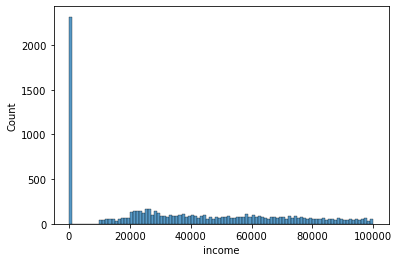

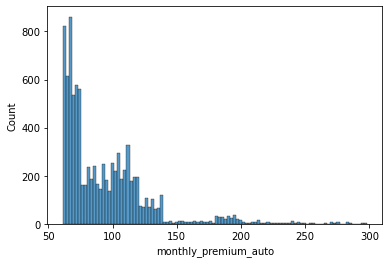

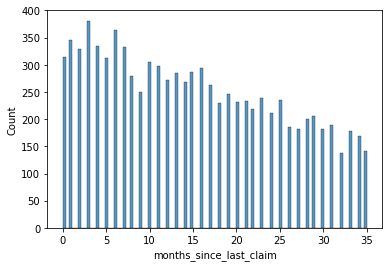

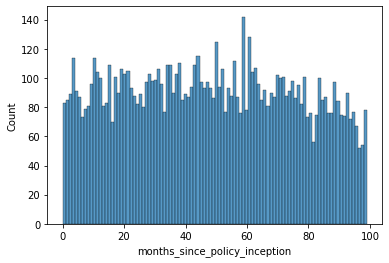

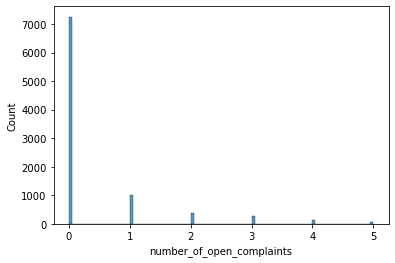

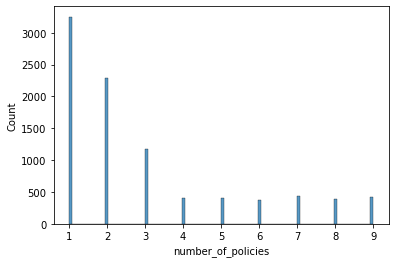

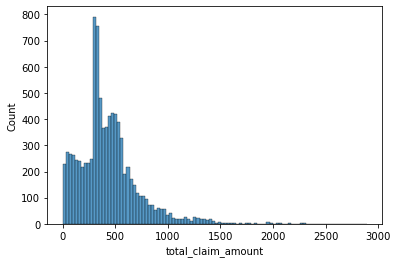

In [216]:

for i in range(X_num.shape[1]):
    sns.histplot(X_num[X_num.columns[i]], bins=100)
    plt.show()

In [217]:
objects.shape

(7982, 15)

In [218]:
#check multicollinearity # encoding categorical data

                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.066227   
income                                        0.066227  1.000000   
monthly_premium_auto                          0.445460  0.036000   
months_since_last_claim                      -0.018731 -0.028572   
months_since_policy_inception                -0.010118  0.004679   
number_of_open_complaints                    -0.033268 -0.001279   
number_of_policies                            0.232904 -0.006339   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.445460                -0.018731   
income                                     0.036000                -0.028572   
monthly_premium_auto                       1.000000                -0.020760   
months_since_last_claim                   -0.020760                 1.000000   
months_since_policy_inception              0.009331    

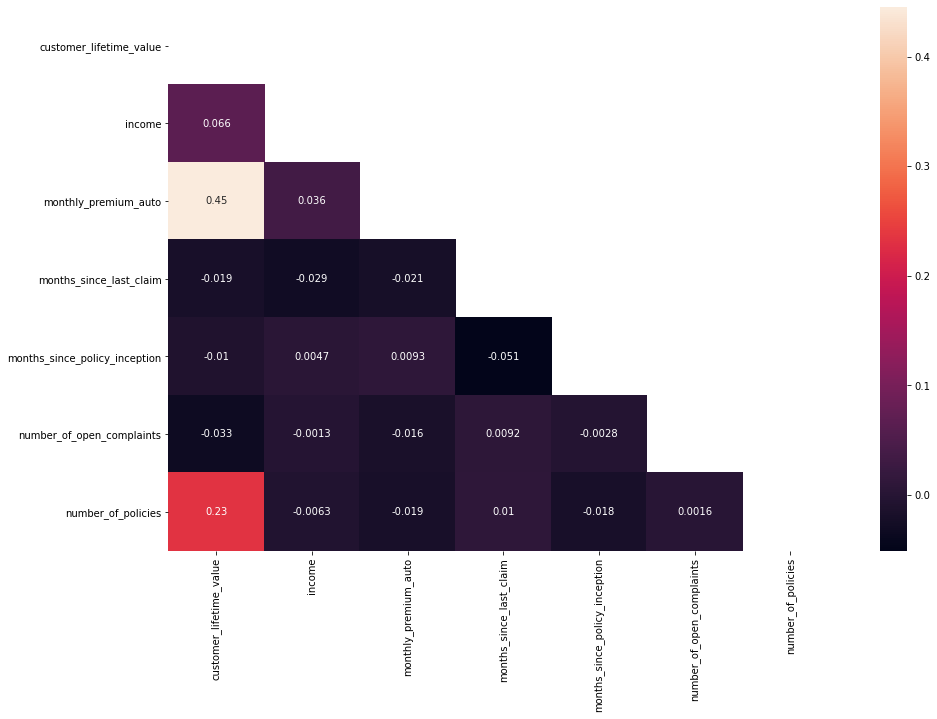

In [219]:
pd.get_dummies(X_cat, drop_first=True)

correlations = numericals.corr()
print(correlations)

mask=np.zeros_like(numericals.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(15, 10))
ax=sns.heatmap(numericals.corr(), mask=mask, annot=True)
plt.show()

In [220]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
# encoder.categories_
encoded = encoder.transform(X_cat).toarray()
encoded

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [221]:
#04 - Processing Data
#Dealing with outliers.
#Normalization.
#Encoding Categorical Data.
#Splitting into train set and test set.

In [222]:
# remove zeros in income


#remove outliers in total claim amount, monthly premium auto, customer lifetime value c

In [223]:
# first log transformation than outlier removal if both methods are applied

In [224]:
# dealing with outliers - Total Claim Amount

iqr = np.percentile(data['total_claim_amount'],75) - np.percentile(data['total_claim_amount'],25)
upper_limit_TCA = np.percentile(data['total_claim_amount'],75) + 1.5*iqr
lower_limit_TCA = np.percentile(data['total_claim_amount'],25) - 1.5*iqr

In [225]:
# dealing with outliers - Customer Lifetime Value

iqr = np.percentile(data['customer_lifetime_value'],75) - np.percentile(data['customer_lifetime_value'],25)
upper_limit_CLV = np.percentile(data['customer_lifetime_value'],75) + 1.5*iqr
lower_limit_CLV = np.percentile(data['customer_lifetime_value'],25) - 1.5*iqr

In [226]:
# dealing with outliers - Monthly Premium Auto

iqr = np.percentile(data['customer_lifetime_value'],75) - np.percentile(data['customer_lifetime_value'],25)
upper_limit_MPA = np.percentile(data['customer_lifetime_value'],75) + 1.5*iqr
lower_limit_MPA = np.percentile(data['customer_lifetime_value'],25) - 1.5*iqr

In [227]:
#removing outliers

data = data[(data['total_claim_amount']>lower_limit_TCA) & (data['total_claim_amount']<upper_limit_TCA) & (data['customer_lifetime_value']>lower_limit_CLV) & (data['customer_lifetime_value']<upper_limit_CLV) & (data['customer_lifetime_value']>lower_limit_MPA) & (data['customer_lifetime_value']<upper_limit_MPA)]



In [228]:
data.shape

(7982, 23)

In [229]:
# Normalization

In [230]:

Y = data['total_claim_amount']
data = data.drop(['total_claim_amount'], axis=1)


In [231]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(numericals)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
pd.DataFrame(x_normalized)

(9134, 8)


,0,1,2,3,4,5,6,7
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.000000,0.000018,0.006830
1,0.987006,0.000000,0.013293,0.001838,0.005939,0.000000,0.001131,0.160005
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.000000,0.000040,0.011230
3,0.997473,0.000000,0.013829,0.002348,0.008480,0.000000,0.000913,0.069128
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.000000,0.000023,0.003145
...,...,...,...,...,...,...,...,...
9129,0.309385,0.950932,0.000965,0.000238,0.001176,0.000000,0.000026,0.002620
9130,0.141858,0.989727,0.003619,0.000641,0.001283,0.000000,0.000046,0.017372
9131,0.995277,0.000000,0.010363,0.001097,0.004511,0.000366,0.000244,0.096406
9132,0.324247,0.945493,0.004137,0.001465,0.000129,0.000000,0.000129,0.029786


In [232]:
#Splitting into train set and test set.

In [233]:
type(x_normalized)

numpy.ndarray

In [239]:
X = np.concatenate((x_normalized, encoded), axis=1)
pd.DataFrame(X).head()
X.shape

(9134, 9238)

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

ValueError: Found input variables with inconsistent numbers of samples: [9134, 7982]

In [ ]:
from sklearn import linear_model

In [241]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
predictions  = lm.predict(x_test)
r2_score(y_test, predictions)

ValueError: could not convert string to float: 'SG54382'

In [ ]:
#05 - Modeling

In [ ]:
#Apply Model

In [ ]:
#06 - Model Validation
#R2.
#MSE.
#RMSE.
#MAE.

In [ ]:
mse = mean_squared_error(y_test, predictions)
print(mse)

In [ ]:
rmse = math.sqrt(mse)
print(rmse)

In [ ]:
r2 = r2_score(y_test, predictions)
r2

In [ ]:
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adj_r2

In [ ]:
#07 - Reporting
#present results